In [30]:
%matplotlib inline
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

OpenCV version: 4.2.0
<class 'bytes'> b'\xff\xd8\xff\xe1\x0c\xd5Exif\x00\x00MM\x00*\x00\x00\x00\x08'
<class 'numpy.ndarray'>
0


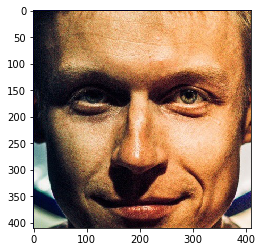

In [130]:
print('OpenCV version:', cv2.__version__)

# Load the cascade
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
# Read the input image
fd = open('doge.jpg', 'rb')
img_str = fd.read()
fd.close()
print(type(img_str), img_str[:20])
image = Image.open(io.BytesIO(img_str))
# print(img_str)
img = cv2.imdecode(np.frombuffer(img_str, np.float), cv2.IMREAD_COLOR)
print(type(img))
# img = cv2.imdecode()
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.5, 5)
print(len(faces))
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    # Save the output image
    cv2.imwrite('detected.jpg', img[y:y+h, x:x+w])
plt.imshow(plt.imread('detected.jpg'))

In [95]:
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
fd = open('me.jpg', 'rb')
img_str = fd.read()
fd.close()
nparr = np.frombuffer(img_str, np.float)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray), plt.show()
faces = face_cascade.detectMultiScale(img, 1.1, 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    img = img[y:y+h, x:x+w]
    # Save the output image
#     cv2.imwrite('detected.jpg', img)
# plt.imshow(plt.imread('detected.jpg'))
# Image.open(io.BytesIO(cv2.imencode('.png', img)[1]))
cv2.imencode('.jpg', img)

(True,
 array([[255],
        [216],
        [255],
        ...,
        [ 81],
        [255],
        [217]], dtype=uint8))

[255 216 255 ... 191 255 217]


error: OpenCV(4.2.0) ..\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


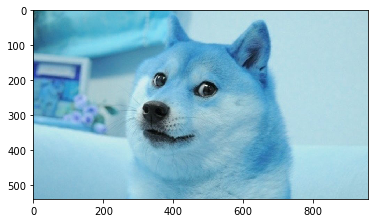

In [120]:
fd = open('doge.jpg', 'rb')
a = fd.read()
fd.close()
arr = np.frombuffer(a, np.uint8)
print(arr)

img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
# print(type(faces), faces)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    img = img[y:y+h, x:x+w]
    # Save the output image
    cv2.imwrite('detected.jpg', img)
        
    
img

In [ ]:
# jpg_original = base64.b64decode(string)
# jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
# img = cv2.imdecode(jpg_as_np, flags=1)

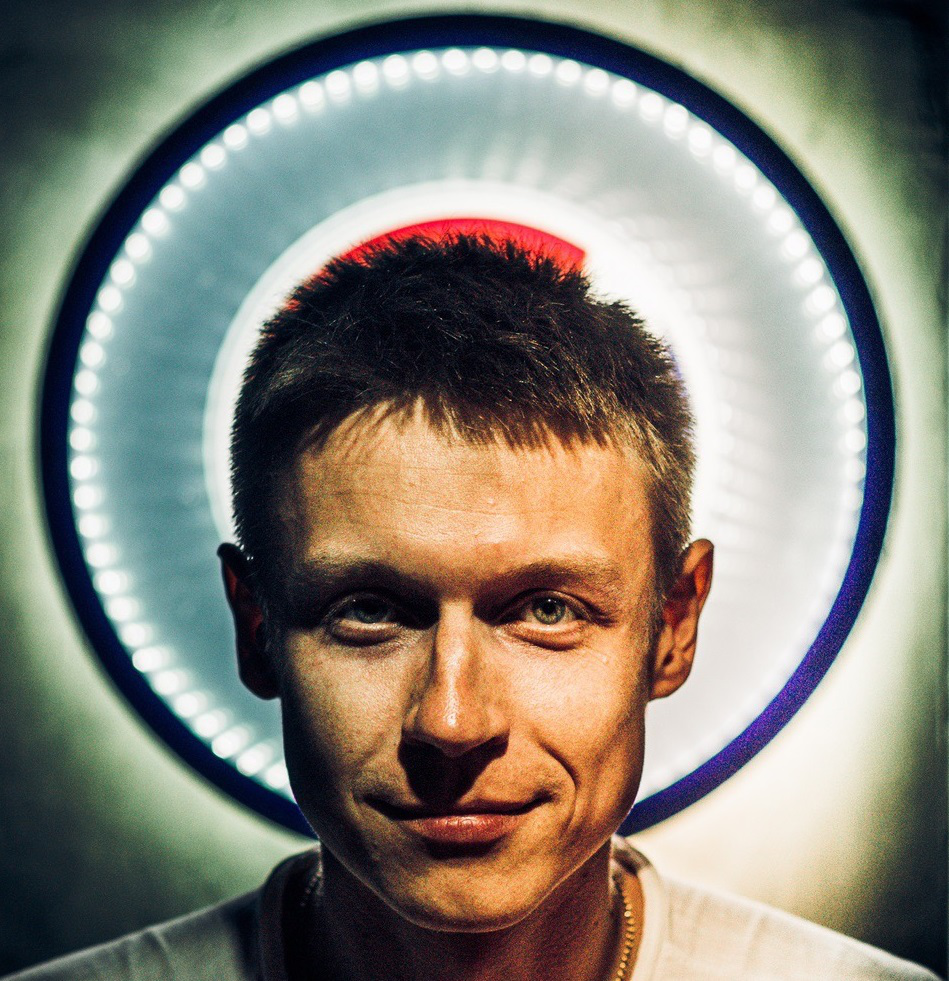

In [60]:
from io import BytesIO

with open('me.jpg', 'rb') as file:
    img = file.read()
Image.open(BytesIO(img))
# img = cv2.imdecode(np.frombuffer(img, np.uint8), cv2.IMREAD_COLOR)
# face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
# faces = face_cascade.detectMultiScale(img, 1.1, 5)

In [99]:
!curl -X POST -F img_file=@me.jpg http://35.195.204.212/predict

Internal Server Error


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 73  349k    0     0   73  256k      0   649k --:--:-- --:--:-- --:--:--  648k
100  349k  100    21  100  349k     15   251k  0:00:01  0:00:01 --:--:--  251k
100  349k  100    21  100  349k     15   251k  0:00:01  0:00:01 --:--:--  251k
